In [1]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import re
from scipy.stats import linregress
import seaborn as sns

In [2]:
# use pandas to read csv into dataframe
file_to_load = os.path.join('..','Resources','pokemon.csv')
pokemon_df = pd.read_csv(file_to_load)
pokemon_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
# check column names
pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [4]:
# check for null values, type2 should have many nulls due to the nature of pokemon types
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [5]:
# total of 801 pokemon in this list, as expected
len(pokemon_df)

801

In [6]:
# number of rows with null values in this column makes up 2.5% of all rows, and therefore is worth the time cleaning
100 * len(pokemon_df[pokemon_df['weight_kg'].isna()]) / len(pokemon_df)

2.4968789013732833

In [7]:
# check that pokemon with null values for height and weight are the same pokemon
pokemon_df[pokemon_df['height_m'].isna()]['name'] == pokemon_df[pokemon_df['weight_kg'].isna()]['name']

18     True
19     True
25     True
26     True
27     True
36     True
37     True
49     True
50     True
51     True
52     True
73     True
74     True
75     True
87     True
88     True
102    True
104    True
719    True
744    True
Name: name, dtype: bool

In [8]:
# added all of the weights manually using serebii.net
pokemon_df.loc[18,'height_m'] = 0.3 
pokemon_df.loc[18,'weight_kg'] = 3.5 

In [9]:
# check that cell value changed
pokemon_df.loc[18,'height_m']

0.3

In [10]:
# repeated for all missing values in height and weight columns
pokemon_df.loc[19,'height_m'] = 0.7 
pokemon_df.loc[19,'weight_kg'] = 18.5

pokemon_df.loc[25,'height_m'] = 0.8 
pokemon_df.loc[25,'weight_kg'] = 30.0

pokemon_df.loc[26,'height_m'] = 0.6 
pokemon_df.loc[26,'weight_kg'] = 12.0

pokemon_df.loc[27,'height_m'] = 1.0 
pokemon_df.loc[27,'weight_kg'] = 29.5

pokemon_df.loc[36,'height_m'] = 0.6
pokemon_df.loc[36,'weight_kg'] = 9.9

pokemon_df.loc[37,'height_m'] = 1.1
pokemon_df.loc[37,'weight_kg'] = 19.9

pokemon_df.loc[49,'height_m'] = 0.2 
pokemon_df.loc[49,'weight_kg'] = 0.8

pokemon_df.loc[50,'height_m'] = 0.7
pokemon_df.loc[50,'weight_kg'] = 33.3

pokemon_df.loc[51,'height_m'] = 0.4
pokemon_df.loc[51,'weight_kg'] = 4.2

pokemon_df.loc[52,'height_m'] = 1.0
pokemon_df.loc[52,'weight_kg'] = 32.0

pokemon_df.loc[73,'height_m'] = 0.4
pokemon_df.loc[73,'weight_kg'] = 20.0

pokemon_df.loc[74,'height_m'] = 1.0
pokemon_df.loc[74,'weight_kg'] = 105.0

pokemon_df.loc[75,'height_m'] = 1.4
pokemon_df.loc[75,'weight_kg'] = 300.0

pokemon_df.loc[87,'height_m'] = 0.9
pokemon_df.loc[87,'weight_kg'] = 30.0

pokemon_df.loc[88,'height_m'] = 1.2
pokemon_df.loc[88,'weight_kg'] = 30.0

pokemon_df.loc[102,'height_m'] = 2.0
pokemon_df.loc[102,'weight_kg'] = 120.0

pokemon_df.loc[104,'height_m'] = 1.0
pokemon_df.loc[104,'weight_kg'] = 45.0

pokemon_df.loc[719,'height_m'] = 0.5
pokemon_df.loc[719,'weight_kg'] = 9.0

pokemon_df.loc[744,'height_m'] = 0.9
pokemon_df.loc[744,'weight_kg'] = 25.0

In [11]:
# data is cleaner
pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg              0
generation             0


In [12]:
# add female percentage
pokemon_df['percentage_female'] = 100 - pokemon_df['percentage_male'] 
pokemon_df['percentage_female']

0      11.9
1      11.9
2      11.9
3      11.9
4      11.9
       ... 
796     NaN
797     NaN
798     NaN
799     NaN
800     NaN
Name: percentage_female, Length: 801, dtype: float64

In [13]:
# create non-binary categories for null gender values
pokemon_df['non-binary'] = 0
pokemon_df.head(2)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,11.9,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,11.9,0


In [14]:
#replace null values for male and female percentages with 0
pokemon_df.loc[pokemon_df['percentage_male'].isna()] = pokemon_df.loc[pokemon_df['percentage_male'].isna()].replace(np.nan, 0)

In [15]:
# gender values are checked, along with is_legendary since most non-binary should be legendary
pokemon_df[['percentage_male', 'is_legendary' , 'percentage_female', 'non-binary']]

,percentage_male,is_legendary,percentage_female,non-binary
0,88.1,0,11.9,0
1,88.1,0,11.9,0
2,88.1,0,11.9,0
3,88.1,0,11.9,0
4,88.1,0,11.9,0
...,...,...,...,...
796,0.0,1,0.0,0
797,0.0,1,0.0,0
798,0.0,1,0.0,0
799,0.0,1,0.0,0


In [16]:
#check a few rows where there should be at least one legendary, and thus non-binary
pokemon_df.iloc[490:493, 10:]

,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
490,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,90,...,135,90,125,dark,0,50.5,4,1,0.0,0
491,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5,103,...,120,75,127,grass,grass,2.1,4,1,0.0,0
492,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,120,...,120,120,120,normal,0,320.0,4,1,0.0,0


In [17]:
# create pandas series containing all non-binary pokemon
nonbinary = pokemon_df.loc[(pokemon_df['percentage_male'] == 0) & (pokemon_df['percentage_female'] == 0)]['non-binary']

In [18]:
# change non-binary pokemon percentages to 100%
nonbinary = nonbinary.replace(0, 100)
#get index for all non-binary pokemon and make a list out of it
nonbinary_index = nonbinary.index.tolist()

In [19]:
non_binary_pokemon = pokemon_df.iloc[nonbinary_index]
non_binary_names = non_binary_pokemon['name'].tolist()

In [20]:
# assign all non-binary pokemon to a percetange of 100%, leaving all binary pokemon at a default of 0%
pokemon_df['non-binary'].iloc[nonbinary_index] = 100

/Users/johnwhendricks/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
#check column to confirm success
pokemon_df['non-binary']

0        0
1        0
2        0
3        0
4        0
      ... 
796    100
797    100
798    100
799    100
800    100
Name: non-binary, Length: 801, dtype: int64

In [22]:
pokemon_df.iloc[490:500]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
490,['Bad Dreams'],2.00,0.5,1.0,1.0,2.0,2.0,1.0,1.0,0.5,...,135,90,125,dark,0,50.5,4,1,0.0,100
491,"['Natural Cure', 'Serene Grace']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,120,75,127,grass,grass,2.1,4,1,0.0,100
492,['Multitype'],1.00,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,...,120,120,120,normal,0,320.0,4,1,0.0,100
493,['Victory Star'],1.00,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,...,100,100,100,psychic,fire,4.0,5,1,0.0,100
494,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,45,55,63,grass,NaN,8.1,5,0,11.9,0
495,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,60,75,83,grass,NaN,16.0,5,0,11.9,0
496,"['Overgrow', 'Contrary']",2.00,1.0,1.0,0.5,1.0,1.0,2.0,2.0,1.0,...,75,95,113,grass,NaN,63.0,5,0,11.9,0
497,"['Blaze', 'Thick Fat']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,45,45,45,fire,NaN,9.9,5,0,11.9,0
498,"['Blaze', 'Thick Fat']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,70,55,55,fire,fighting,55.5,5,0,11.9,0
499,"['Blaze', 'Reckless']",0.25,0.5,1.0,1.0,1.0,1.0,0.5,2.0,1.0,...,100,65,65,fire,fighting,150.0,5,0,11.9,0


In [23]:
# cleaned values in row 773
pokemon_df.iloc[773,23] = '30'
clean_pokemon_df = pokemon_df.copy()
clean_pokemon_df.iloc[773,23]

'30'

In [24]:
# change capture_rate from string to int
clean_pokemon_df=clean_pokemon_df.astype({'capture_rate':int})
clean_pokemon_df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate           int64
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [25]:
# only type2 has null values, which will be changed later to none
clean_pokemon_df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male        0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                346
weight_kg              0
generation             0


In [26]:
# replace all null and 0 values in type2 with none
clean_pokemon_df.loc[:, clean_pokemon_df.columns == 'type2'] = clean_pokemon_df.loc[:, 'type2'].replace(np.nan, 'none').replace(0,'none')
clean_pokemon_df['type2']

0      poison
1      poison
2      poison
3        none
4        none
        ...  
796    flying
797     steel
798    dragon
799      none
800     fairy
Name: type2, Length: 801, dtype: object

r value: 0.0453511986460209
p value: 0.1997786859179645


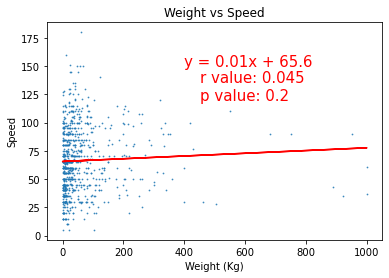

In [27]:
# plot weight vs speed: no relationship apparent
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['weight_kg'].values.tolist(), clean_pokemon_df['speed'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(weight * slope + intercept) for weight in clean_pokemon_df['weight_kg'].values.tolist()]
plt.scatter(clean_pokemon_df['weight_kg'],clean_pokemon_df['speed'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['weight_kg'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (400,150), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {round(p_value,3)}", (450,120), fontsize = 15, color = 'red')
print(f"r value: {r_value}\np value: {p_value}")
plt.title("Weight vs Speed")
plt.xlabel("Weight (Kg)")
plt.ylabel("Speed")
plt.show()

r value: 0.6264207002953233
p_value: 1.6117587628866627e-88


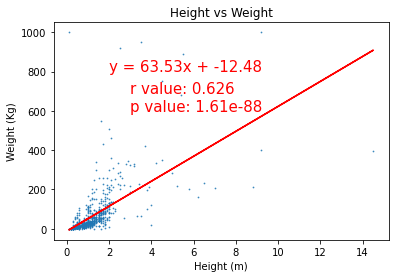

In [28]:
# plot height vs weight: positive linear relationship
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['height_m'].values.tolist(), clean_pokemon_df['weight_kg'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(height * slope + intercept) for height in clean_pokemon_df['height_m'].values.tolist()]
plt.scatter(clean_pokemon_df['height_m'],clean_pokemon_df['weight_kg'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['height_m'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (2,800), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {'{:0.2e}'.format(p_value)}", (3,600), fontsize = 15, color = 'red')
print(f"r value: {r_value}\np_value: {p_value}")
plt.title("Height vs Weight")
plt.xlabel("Height (m)")
plt.ylabel("Weight (Kg)")
plt.show()

r value: 0.3681539995495992\ p_values: 4.085321011486335e-27


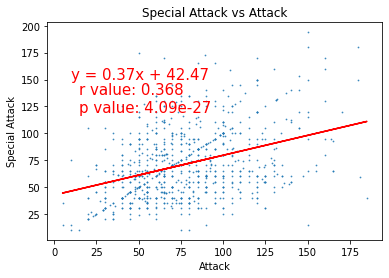

In [29]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['attack'].values.tolist(), clean_pokemon_df['sp_attack'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['attack'].values.tolist()]
plt.scatter(clean_pokemon_df['attack'],clean_pokemon_df['sp_attack'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['attack'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (10,150), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {'{:0.2e}'.format(p_value)}", (15,120), fontsize = 15, color = 'red')
print(f"r value: {r_value}\ p_values: {p_value}")
plt.title("Special Attack vs Attack")
plt.xlabel("Attack")
plt.ylabel("Special Attack")
plt.show()

r value: 0.4689149139189303
p value: 4.963087263906659e-45


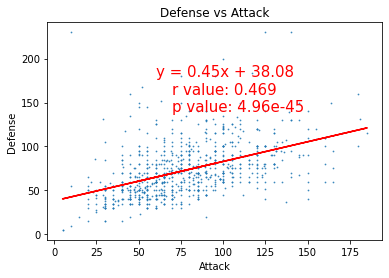

In [30]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['attack'].values.tolist(), clean_pokemon_df['defense'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['attack'].values.tolist()]
plt.scatter(clean_pokemon_df['attack'],clean_pokemon_df['defense'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['attack'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (60,180), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {'{:0.2e}'.format(p_value)}", (70,140), fontsize = 15, color = 'red')
print(f"r value: {r_value}\np value: {p_value}")
plt.title("Defense vs Attack")
plt.xlabel("Attack")
plt.ylabel("Defense")
plt.show()

r value: 0.5263482757215798
p value: 2.7758938639691632e-58


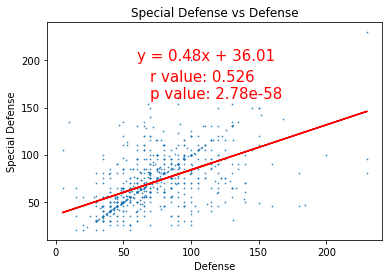

In [31]:
(slope, intercept, r_value, p_value, std_err) = linregress(clean_pokemon_df['defense'].values.tolist(), clean_pokemon_df['sp_defense'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in clean_pokemon_df['defense'].values.tolist()]
plt.scatter(clean_pokemon_df['defense'],clean_pokemon_df['sp_defense'], s = 0.6, alpha = 0.8)
plt.plot(clean_pokemon_df['defense'].values.tolist(),regress_values,"r")
plt.annotate(line_eq, (60,200), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {'{:0.2e}'.format(p_value)}", (70,160), fontsize = 15, color = 'red')
print(f"r value: {r_value}\np value: {p_value}")
plt.title("Special Defense vs Defense")
plt.xlabel("Defense")
plt.ylabel("Special Defense")
plt.show()

r value: 0.14015778312971014
p value: 6.885582462263998e-05


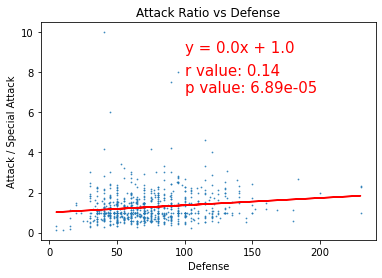

In [32]:
dfns= clean_pokemon_df['defense']
atk_ratio = clean_pokemon_df['attack'] / clean_pokemon_df['sp_attack']
(slope, intercept, r_value, p_value, std_err) = linregress(dfns.values.tolist(), atk_ratio.values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in dfns.values.tolist()]
plt.scatter(dfns,atk_ratio,s = 0.6, alpha = 0.8 )
plt.plot(dfns.values.tolist(),regress_values,"r")
plt.annotate(line_eq, (100,9), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {'{:0.2e}'.format(p_value)}", (100,7), fontsize = 15, color = 'red')
print(f"r value: {r_value}\np value: {p_value}")
plt.title("Attack Ratio vs Defense")
plt.xlabel("Defense")
plt.ylabel("Attack / Special Attack")
plt.show()

r value: -0.2035568709000876
p value: 6.1353853774002705e-09


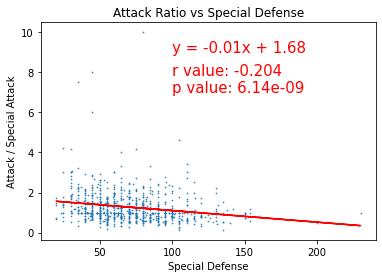

In [33]:
sdfns= clean_pokemon_df['sp_defense']
atk_ratio = clean_pokemon_df['attack'] / clean_pokemon_df['sp_attack']
(slope, intercept, r_value, p_value, std_err) = linregress(sdfns.values.tolist(), atk_ratio.values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in sdfns.values.tolist()]
plt.scatter(sdfns,atk_ratio,s = 0.6, alpha = 0.8 )
plt.plot(sdfns.values.tolist(),regress_values,"r")
plt.annotate(line_eq, (100,9), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {'{:0.2e}'.format(p_value)}", (100,7), fontsize = 15, color = 'red')
print(f"r value: {r_value}\np value: {p_value}")
plt.title("Attack Ratio vs Special Defense")
plt.xlabel("Special Defense")
plt.ylabel("Attack / Special Attack")
plt.show()

r value: -0.0513715173755248
p value: 0.14633416623438045


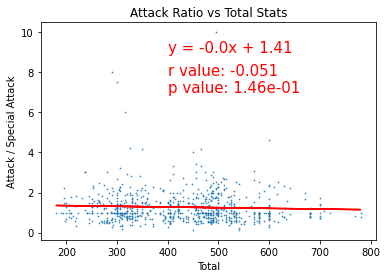

In [34]:
base_tot = clean_pokemon_df['base_total']
(slope, intercept, r_value, p_value, std_err) = linregress(base_tot.values.tolist(), atk_ratio.values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in base_tot.values.tolist()]
plt.scatter(base_tot, atk_ratio,s = 0.6, alpha = 0.8 )
plt.plot(base_tot.values.tolist(),regress_values,"r")
plt.annotate(line_eq, (400,9), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)}\np value: {'{:0.2e}'.format(p_value)}", (400,7), fontsize = 15, color = 'red')
print(f"r value: {r_value}\np value: {p_value}")
plt.title("Attack Ratio vs Total Stats")
plt.xlabel("Total")
plt.ylabel("Attack / Special Attack")
plt.show()

Text(0, 0.5, 'Happiness')

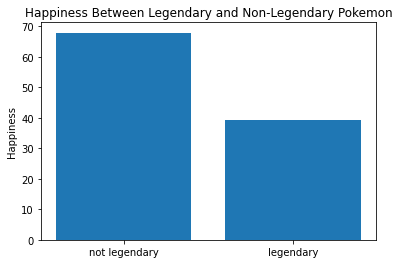

In [35]:
happiness = clean_pokemon_df.groupby('is_legendary').mean()['base_happiness']
plt.bar(['not legendary', 'legendary'],[happiness[0], happiness[1]])
plt.title("Happiness Between Legendary and Non-Legendary Pokemon")
plt.ylabel('Happiness')

Text(0, 0.5, 'Base Total')

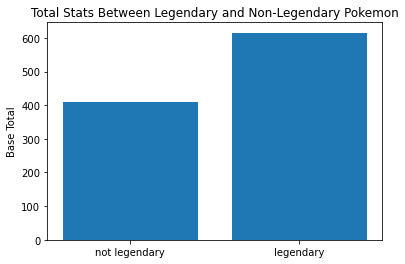

In [36]:
base_tot = clean_pokemon_df.groupby('is_legendary').mean()['base_total']
plt.bar(['not legendary', 'legendary'],[base_tot[0], base_tot[1]])
plt.title("Total Stats Between Legendary and Non-Legendary Pokemon")
plt.ylabel('Base Total')

Text(0, 0.5, 'Capture Rate')

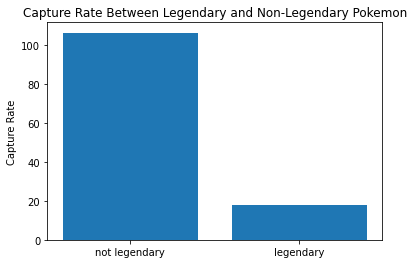

In [37]:
capt_rate = clean_pokemon_df.groupby('is_legendary').mean()['capture_rate']
plt.bar(['not legendary', 'legendary'],[capt_rate[0], capt_rate[1]])
plt.title("Capture Rate Between Legendary and Non-Legendary Pokemon")
plt.ylabel('Capture Rate')

<BarContainer object of 2 artists>

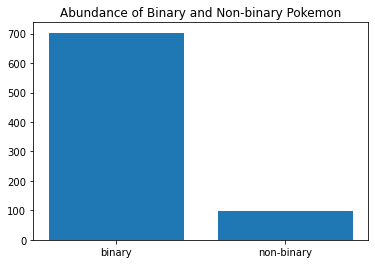

In [38]:
# Majority of pokemon are binary, rouhgly 8 to 1
non_binary_counts = clean_pokemon_df.groupby('non-binary').count()['is_legendary']
ind = ['binary', 'non-binary']
val = non_binary_counts.values.tolist()
plt.title('Abundance of Binary and Non-binary Pokemon')
plt.bar(ind, val)

Text(0.5, 0, 'Height (m)')

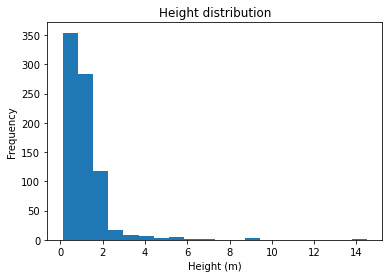

In [39]:
# histogram of height distribution
ax = clean_pokemon_df['height_m'].plot.hist(bins=20, title="Height distribution")
ax.set_xlabel("Height (m)")

Text(0.5, 0, 'Weight (Kg)')

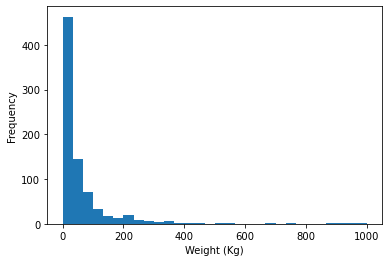

In [40]:
# histogram of weight distribution
ax = clean_pokemon_df['weight_kg'].plot.hist(bins=30)
ax.set_xlabel("Weight (Kg)")

Text(0.5, 0, 'Base Total Stats')

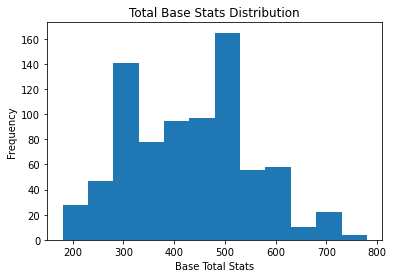

In [41]:
ax = clean_pokemon_df['base_total'].plot.hist(bins=12, title = "Total Base Stats Distribution")
ax.set_xlabel("Base Total Stats")

Text(0.5, 0, 'Base Speed')

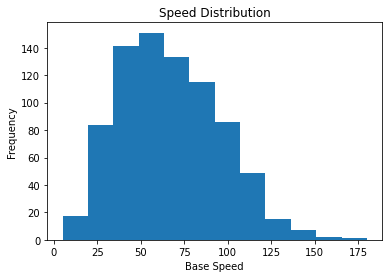

In [42]:
ax = clean_pokemon_df['speed'].plot.hist(bins=12, title = "Speed Distribution")
ax.set_xlabel("Base Speed")

Text(0.5, 0, 'Base Attack')

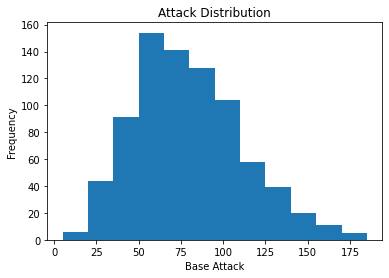

In [43]:
ax = clean_pokemon_df['attack'].plot.hist(bins=12, title = "Attack Distribution")
ax.set_xlabel("Base Attack")

Text(0.5, 0, 'Special Attack')

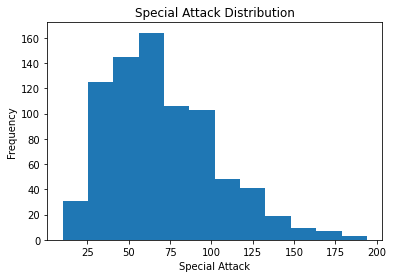

In [44]:
ax = clean_pokemon_df['sp_attack'].plot.hist(bins=12, title = "Special Attack Distribution")
ax.set_xlabel("Special Attack")

Text(0.5, 0, 'Base Defense')

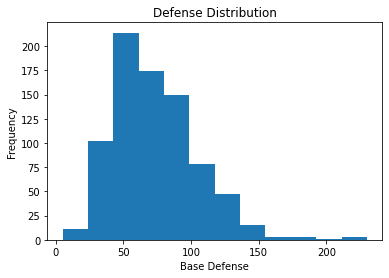

In [45]:
ax = clean_pokemon_df['defense'].plot.hist(bins=12, title="Defense Distribution")
ax.set_xlabel("Base Defense")

Text(0.5, 0, 'Base Special Defense')

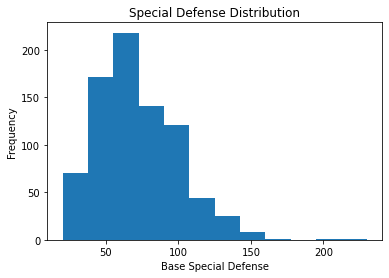

In [46]:
ax = clean_pokemon_df['sp_defense'].plot.hist(bins=12, title = "Special Defense Distribution")
ax.set_xlabel("Base Special Defense")

Text(0.5, 0, 'Base HP')

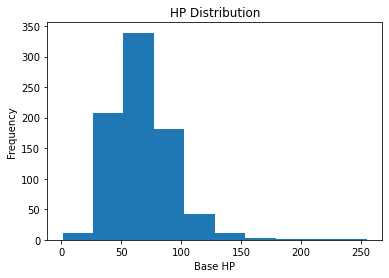

In [47]:
ax = clean_pokemon_df['hp'].plot.hist(bins=10, title = "HP Distribution")
ax.set_xlabel("Base HP")

Text(0.5, 0, 'Capture Rate')

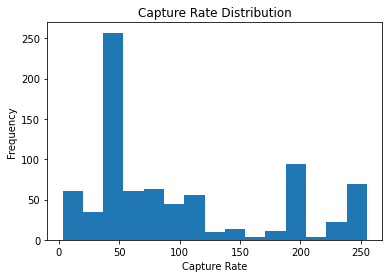

In [48]:
ax = clean_pokemon_df['capture_rate'].plot.hist(bins=15, title = "Capture Rate Distribution")
ax.set_xlabel("Capture Rate")

In [49]:
# dataframe of non-binary pokemon only
nonBinary_df = clean_pokemon_df.loc[clean_pokemon_df['non-binary'] == 100]
nonBinary_df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
80,"['Magnet Pull', 'Sturdy', 'Analytic']",0.5,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,95,55,45,electric,steel,6.0,1,0,0.0,100
81,"['Magnet Pull', 'Sturdy', 'Analytic']",0.5,1.0,0.5,0.5,0.5,2.0,2.0,0.25,1.0,...,120,70,70,electric,steel,60.0,1,0,0.0,100
99,"['Soundproof', 'Static', 'Aftermath']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,55,55,100,electric,none,10.4,1,0,0.0,100
100,"['Soundproof', 'Static', 'Aftermath']",1.0,1.0,1.0,0.5,1.0,1.0,1.0,0.50,1.0,...,80,80,150,electric,none,66.6,1,0,0.0,100
119,"['Illuminate', 'Natural Cure', 'Analytic']",1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.00,1.0,...,70,55,85,water,none,34.5,1,0,0.0,100


In [50]:
# dataframe of binary pokemon only
binary_df = clean_pokemon_df.loc[clean_pokemon_df['non-binary'] == 0]

In [51]:
generations = clean_pokemon_df.groupby('generation').count()
generations

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,is_legendary,percentage_female,non-binary
generation,,,,,,,,,,,,,,,,,,,,,
1,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,151,151,151
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,135,135,135,135,135,135,135,135,135,135,...,135,135,135,135,135,135,135,135,135,135
4,107,107,107,107,107,107,107,107,107,107,...,107,107,107,107,107,107,107,107,107,107
5,156,156,156,156,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
6,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
7,80,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80


In [52]:
generations_list = generations.index.tolist()

In [53]:
# number of pokemon in each generation (a "generation" is a new set of games in the video game series)
generations['name']

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: name, dtype: int64

Text(0, 0.5, 'Number of Unique Pokemon')

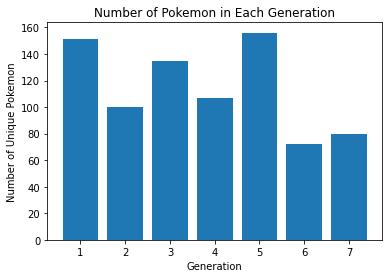

In [54]:
# last two generations have less pokemon than any of the previous generations
plt.bar(generations_list, generations['name'])
plt.title("Number of Pokemon in Each Generation")
plt.xlabel("Generation")
plt.ylabel("Number of Unique Pokemon")

r value: -0.5709740489725594 
p value: 0.18062869821794605


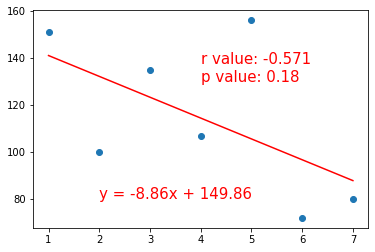

In [55]:
# overal negative linear trend in number of pokemon, though the p value is greater than 0.05, so unpredictable
(slope, intercept, r_value, p_value, std_err) = linregress(generations_list, generations['name'].values.tolist())
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = [(a * slope + intercept) for a in generations_list]
plt.scatter(generations_list, generations['name'].values.tolist())
plt.plot(generations_list, regress_values,"r")
plt.annotate(line_eq, (2,80), fontsize=15, color="red")
plt.annotate(f"r value: {round(r_value,3)} \np value: {round(p_value,2)}", (4,130), fontsize=15, color="red")
print(f"r value: {r_value} \np value: {p_value}")
plt.show()

In [56]:
clean_pokemon_df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary', 'percentage_female', 'non-binary'],
      dtype='object')

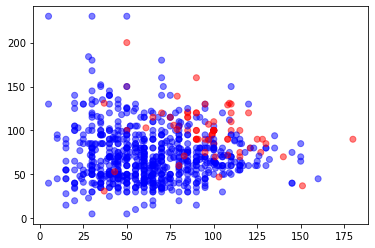

In [57]:
# legendary pokemon show different relationship b/w stats from non-legendary pokemon
rarity_dict = {0:'blue', 1:'red'}
scatter = plt.scatter(clean_pokemon_df['speed'], clean_pokemon_df['defense'], c = clean_pokemon_df['is_legendary'].map(rarity_dict), alpha=0.5)

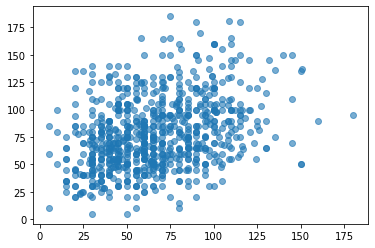

In [58]:
# appears to be trends with all of the stats - will summarize in more detail later in this file
plt.scatter(clean_pokemon_df['speed'], clean_pokemon_df['attack'], alpha=0.6)

In [59]:
clean_pokemon_df.head(2)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,11.9,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,11.9,0


In [60]:
# use index of all stat columns for making a dataframe with just stat info 
stat_index = [19,25,28, 33, 34, 35, 40]
stats_df = clean_pokemon_df.iloc[:, stat_index]

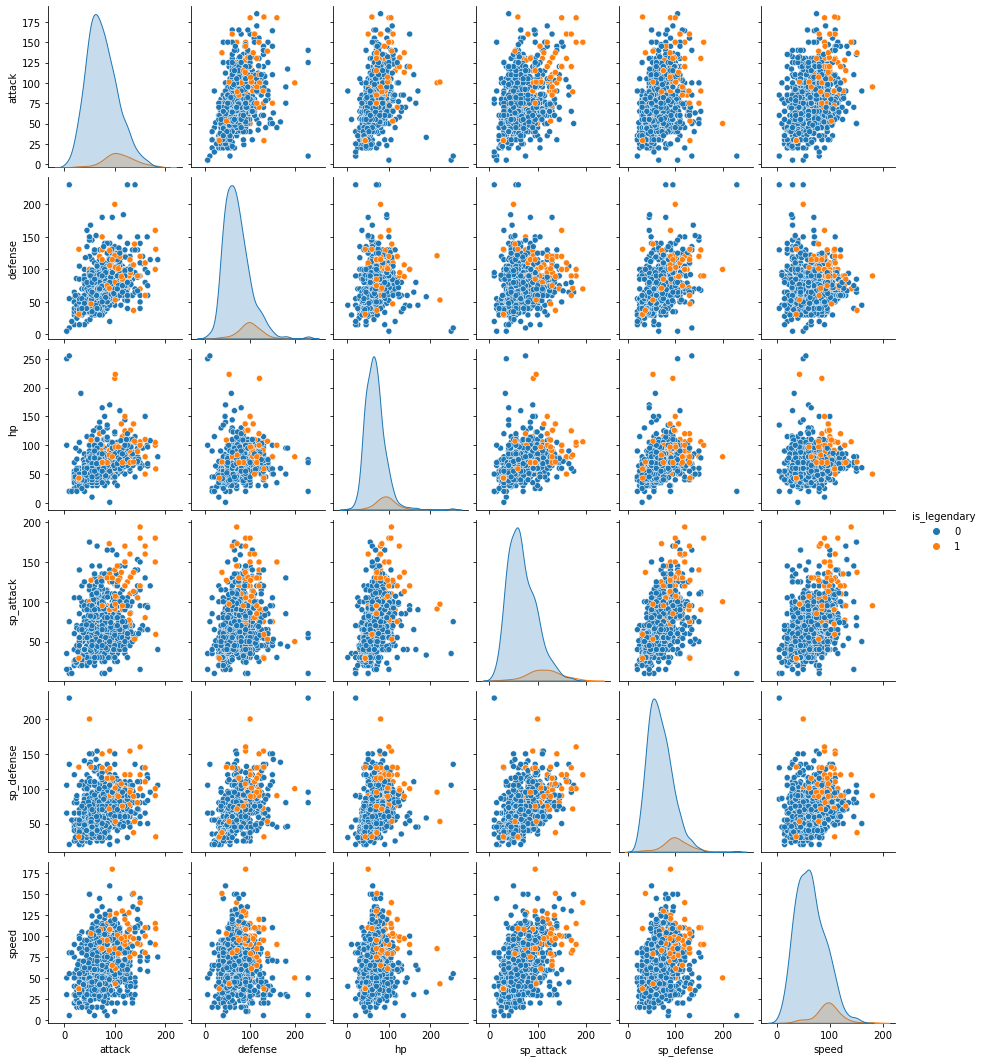

In [61]:
# plot the stats information in pairplot, stats show less of a relationship for legendaries
# the distributions show that there are non-legendary pokemon that have higher stats the even the strongest legendaries
sns.pairplot(stats_df, aspect = 0.85, hue = 'is_legendary')

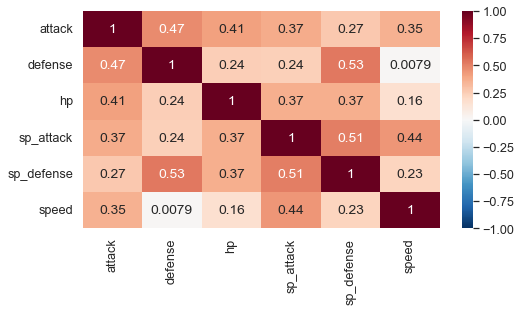

In [62]:
# creat heatmap for the stats
# special defense and defense show the highest correlation, speed and defense have no correlation
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    stats_df.iloc[:,0:6].corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

In [63]:
# make copy of dataframe for ease of use
df = clean_pokemon_df.copy()
df.attack

0       49
1       62
2      100
3       52
4       64
      ... 
796    101
797    181
798    101
799    107
800     95
Name: attack, Length: 801, dtype: int64

In [72]:
df.sort_values(by=['attack'], ascending=False)[['name', 'attack']].head(10)

,name,attack
213,Heracross,185
797,Kartana,181
382,Groudon,180
383,Rayquaza,180
444,Garchomp,170
408,Rampardos,165
353,Banette,165
474,Gallade,165
247,Tyranitar,164
288,Slaking,160


In [73]:
df.sort_values(by=['defense'], ascending=False)[['name', 'defense']].head(10)

,name,defense
305,Aggron,230
212,Shuckle,230
207,Steelix,230
376,Regirock,200
712,Avalugg,184
90,Cloyster,180
79,Slowbro,180
410,Bastiodon,168
94,Onix,160
382,Groudon,160


In [74]:
df.sort_values(by=['hp'], ascending=False)[['name', 'hp']].head(10)

,name,hp
241,Blissey,255
112,Chansey,250
798,Guzzlord,223
717,Zygarde,216
201,Wobbuffet,190
320,Wailord,170
593,Alomomola,165
142,Snorlax,160
486,Giratina,150
425,Drifblim,150


In [75]:
df.sort_values(by=['base_total'], ascending=False)[['name', 'base_total']].head(10)

,name,base_total
149,Mewtwo,780
383,Rayquaza,780
382,Groudon,770
381,Kyogre,770
492,Arceus,720
717,Zygarde,708
380,Latios,700
372,Salamence,700
247,Tyranitar,700
444,Garchomp,700


In [76]:
df.sort_values(by=['base_happiness'], ascending=False)[['name', 'base_happiness']].head(10)

,name,base_happiness
34,Clefairy,140
481,Azelf,140
35,Clefable,140
172,Cleffa,140
427,Lopunny,140
439,Happiny,140
241,Blissey,140
112,Chansey,140
479,Uxie,140
480,Mesprit,140


In [77]:
df.sort_values(by=['speed'], ascending=False)[['name', 'speed']].head(10)

,name,speed
385,Deoxys,180
290,Ninjask,160
794,Pheromosa,151
100,Electrode,150
141,Aerodactyl,150
64,Alakazam,150
616,Accelgor,145
253,Sceptile,145
14,Beedrill,145
149,Mewtwo,140


In [78]:
# the type attribute is difficult to analyze due the nature of it, so first visualize it
df.groupby(['type1','type2']).count().head(30)

abilities  against_bug  against_dark  against_dragon  \
type1  type2                                                            
bug    electric          4            4             4               4   
       fairy             2            2             2               2   
       fighting          3            3             3               3   
       fire              2            2             2               2   
       flying           13           13            13              13   
       ghost             1            1             1               1   
       grass             6            6             6               6   
       ground            1            1             1               1   
       none             18           18            18              18   
       poison           11           11            11              11   
       rock              3            3             3               3   
       steel             5            5             5               5   
       water             3            3             3               3   
dark   dragon            4            4             4               4   
       fighting          2            2             2               2   
       fire              2            2             2               2   
       flying            5            5             5               5   
       ghost             1            1             1               1   
       ice               2            2             2               2   
       none              9            9             9               9   
       psychic           2            2             2               2   
       steel             2            2             2               2   
dragon electric          1            1             1               1   
       fighting          2            2             2               2   
       fire              1            1             1               1   
       flying            4            4             4               4   
       ground            4            4             4               4   
       ice               1            1             1               1   
       none             12           12            12              12   
       psychic           2            2             2               2   

                 against_electric  against_fairy  against_fight  against_fire  \
type1  type2                                                                    
bug    electric                 4              4              4             4   
       fairy                    2              2              2             2   
       fighting                 3              3              3             3   
       fire                     2              2              2             2   
       flying                  13             13             13            13   
       ghost                    1              1              1             1   
       grass                    6              6              6             6   
       ground                   1              1              1             1   
       none                    18             18             18            18   
       poison                  11             11             11            11   
       rock                     3              3              3             3   
       steel                    5              5              5             5   
       water                    3              3              3             3   
dark   dragon                   4              4              4             4   
       fighting                 2              2              2             2   
       fire                     2              2              2             2   
       flying                   5              5              5             5   
       ghost                    1              1              1             1   
       ice                      2              2            

In [79]:
# using fire type as an example, we can extract pokemon that are fire type
fire_df = clean_pokemon_df[(clean_pokemon_df['type1'] == 'fire') | (clean_pokemon_df['type2'] == 'fire')]
fire_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female,non-binary
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,60,50,65,fire,none,8.5,1,0,11.9,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,80,65,80,fire,none,19.0,1,0,11.9,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.50,0.5,0.50,1.0,1.0,...,159,115,100,fire,flying,90.5,1,0,11.9,0
36,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,50,65,65,fire,ice,9.9,1,0,75.4,0
37,"['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...",0.50,1.0,1.0,1.0,0.50,1.0,0.50,1.0,1.0,...,81,100,109,fire,ice,19.9,1,0,75.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,"['Blaze', 'Intimidate']",1.00,0.5,1.0,1.0,1.00,2.0,0.50,1.0,0.5,...,80,90,60,fire,dark,83.0,7,0,11.9,0
740,['Dancer'],0.25,1.0,1.0,2.0,0.50,0.5,0.50,1.0,1.0,...,98,70,93,fire,flying,3.4,7,0,75.4,0
756,"['Corrosion', 'Oblivious']",0.25,1.0,1.0,1.0,0.25,0.5,0.50,1.0,1.0,...,71,40,77,poison,fire,4.8,7,0,11.9,0
757,"['Corrosion', 'Oblivious']",0.25,1.0,1.0,1.0,0.25,0.5,0.50,1.0,1.0,...,111,60,117,poison,fire,22.2,7,0,100.0,0


In [80]:
# every possible type shows up in type1, 
# so we only have to iterate through df['type1'] to obtain every unique type
types = df['type1'].values.tolist()

# will hold every possible type
types_list = []

# itterate thru each type in types and add to types_list if not yet in types_list
for _type in types:
    if _type not in types_list:
        types_list.append(_type)

# types_list holds each unique type
types_list

['grass',
 'fire',
 'water',
 'bug',
 'normal',
 'poison',
 'electric',
 'ground',
 'fairy',
 'fighting',
 'psychic',
 'rock',
 'ghost',
 'ice',
 'dragon',
 'dark',
 'steel',
 'flying']

In [81]:
# there are 18 different types
num_types = len(types_list)
num_types

18

In [84]:
# calculate every possible type
# subtract 1 because type2 cannot be the same as type1
# add 1 because type2 can be nonexistant
all_combos_possible = num_types * (num_types - 1 + 1)
all_combos_possible

324

In [85]:
# dictionary holds each type of pokemon as a dataframe
type_dict = dict()
for _type in types_list:
    type_dict[_type] = clean_pokemon_df[(clean_pokemon_df['type1'] == _type) | (clean_pokemon_df['type2'] == _type)]

In [86]:
# check to confirm that the dictionary is structured as intended
type_dict['fire'].equals(fire_df)

True

In [87]:
# there are 77 bug pokemon
len(type_dict['bug'])

77

In [88]:
# make list containing the number of pokemon from each type
num_types = []
for _type in types_list:
    length = len(type_dict[_type])
    num_types.append(length)
num_types

[97, 64, 131, 77, 109, 64, 47, 64, 47, 53, 82, 59, 41, 38, 44, 50, 46, 98]

In [89]:
# convert last output to a percentage
total_pokemon = len(df)
pct_list = []
for num in num_types:
    pct = round(num/total_pokemon*100,1)
    pct_list.append(pct)
pct_list

[12.1,
 8.0,
 16.4,
 9.6,
 13.6,
 8.0,
 5.9,
 8.0,
 5.9,
 6.6,
 10.2,
 7.4,
 5.1,
 4.7,
 5.5,
 6.2,
 5.7,
 12.2]

Text(0.5, 1.0, 'Frequency of Each Type of Pokemon')

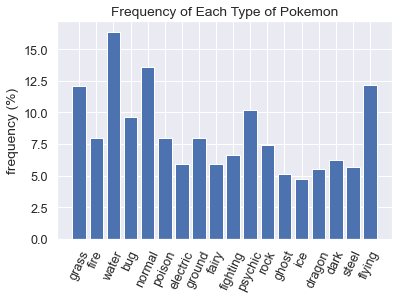

In [106]:
# ice types are the leaset common, followed by ghost
plt.bar(types_list, pct_list)
plt.xticks(rotation = 65)
plt.ylabel('frequency (%)')
plt.title("Frequency of Each Type of Pokemon")

In [107]:
# we can find the average base total of each pokemon type
type_dict['bug']['base_total'].mean()

380.4415584415584

Text(0, 0.5, 'Average Base Total')

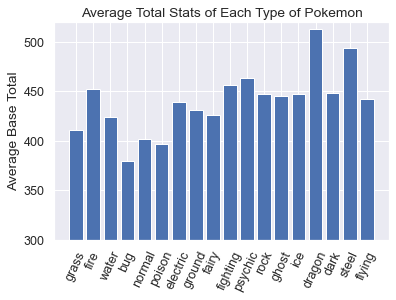

In [108]:
# graph each type by its average total base stat
# dragon has the highest base stats, whereas bug has the lowest
types_base_total = list()

for _type in types_list:
    _mean = type_dict[_type]['base_total'].mean()
    types_base_total.append(round(_mean,0))

plt.bar(types_list, types_base_total)
plt.xticks(rotation = 65)
plt.ylim(300, 520)
plt.title("Average Total Stats of Each Type of Pokemon")
plt.ylabel("Average Base Total")

Text(0.5, 1.0, 'Average Attack of Each Type of Pokemon')

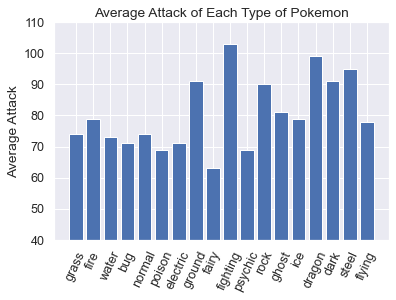

In [109]:
# fairy have lowest average attack, and fighting has the highest
types_attack = list()
for _type in types_list:
    _mean = type_dict[_type]['attack'].mean()
    types_attack.append(round(_mean,0))

plt.bar(types_list, types_attack)
plt.xticks(rotation = 65)
plt.ylim(40,110)
plt.ylabel('Average Attack')
plt.title("Average Attack of Each Type of Pokemon")

Text(0, 0.5, 'Weight (Kg)')

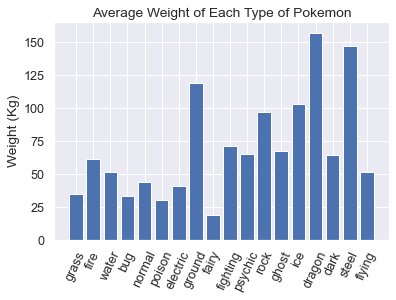

In [110]:
types_weight = list()
for _type in types_list:
    _mean = type_dict[_type]['weight_kg'].mean()
    types_weight.append(round(_mean,0))

plt.bar(types_list, types_weight)
plt.xticks(rotation = 65)
plt.title("Average Weight of Each Type of Pokemon")
plt.ylabel("Weight (Kg)")

Text(0.5, 1.0, 'Average Height of Each Type of Pokemon')

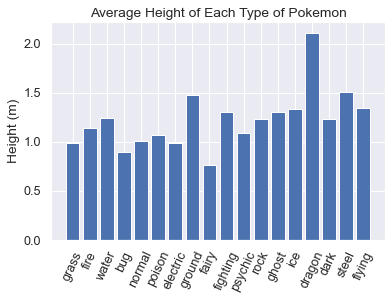

In [111]:
types_height = list()
for _type in types_list:
    _mean = type_dict[_type]['height_m'].mean()
    types_height.append(_mean)

plt.bar(types_list, types_height)
plt.xticks(rotation = 65)
plt.ylabel("Height (m)")
plt.title("Average Height of Each Type of Pokemon")

Text(0.5, 1.0, 'Average Speed of Each Type of Pokemon')

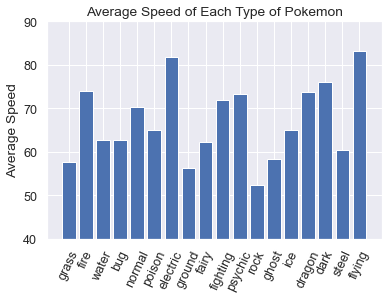

In [112]:
types_speed = list()
for _type in types_list:
    _mean = type_dict[_type]['speed'].mean()
    types_speed.append(_mean)

plt.bar(types_list, types_speed)
plt.xticks(rotation = 65)
plt.ylim(40,90)
plt.ylabel("Average Speed")
plt.title("Average Speed of Each Type of Pokemon")

Text(0.5, 1.0, 'Distribution of Legendary Pokemon by Type')

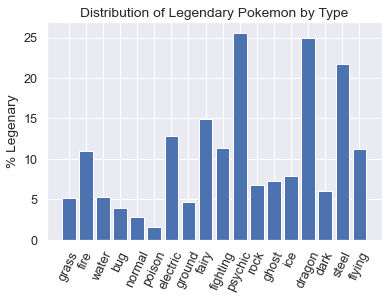

In [114]:
types_legd = list()
for _type in types_list:
    _mean = type_dict[_type]['is_legendary'].mean() * 100
    types_legd.append(_mean)

plt.bar(types_list, types_legd)
plt.xticks(rotation = 65)
plt.ylabel("% Legenary")
plt.title("Distribution of Legendary Pokemon by Type")

In [117]:
# these values are messy strings - will need to clean in order to perform proper analysis
ability_list = clean_pokemon_df.abilities.values.tolist()
ability_list

["['Overgrow', 'Chlorophyll']",
 "['Overgrow', 'Chlorophyll']",
 "['Overgrow', 'Chlorophyll']",
 "['Blaze', 'Solar Power']",
 "['Blaze', 'Solar Power']",
 "['Blaze', 'Solar Power']",
 "['Torrent', 'Rain Dish']",
 "['Torrent', 'Rain Dish']",
 "['Torrent', 'Rain Dish']",
 "['Shield Dust', 'Run Away']",
 "['Shed Skin']",
 "['Compoundeyes', 'Tinted Lens']",
 "['Shield Dust', 'Run Away']",
 "['Shed Skin']",
 "['Swarm', 'Sniper']",
 "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
 "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
 "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
 "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
 "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
 "['Keen Eye', 'Sniper']",
 "['Keen Eye', 'Sniper']",
 "['Intimidate', 'Shed Skin', 'Unnerve']",
 "['Intimidate', 'Shed Skin', 'Unnerve']",
 "['Static', 'Lightningrod']",
 "['Static', 'Lightningrod', 'Surge Surfer']",
 "['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slush Rush']",
 "['Sand Veil',

In [ ]:
cleaner_ability_list = []

for ability_group in ability_list:
    ability_group = ability_group.strip('[').strip(']').replace(' ','').split(',')
    cleaner_ability_list.append(ability_group)
cleaner_ability_list

In [ ]:
clean_ability_list = []
for group in cleaner_ability_list:
    for ability in group:
        ability = ability.strip("'")
        clean_ability_list.append(ability)
clean_ability_list       

In [ ]:
# same as last cell, but with a dictionary
clean_ability_dict = {}
group_counter = 0
for group in cleaner_ability_list:
    group_list = []
    for ability in group:
        ability = ability.strip("'")
        group_list.append(ability)
    clean_ability_dict[group_counter] = group_list
    group_counter += 1

clean_ability_dict


In [ ]:
# average number of abilities is 2.5, which rounds to 3
avg_num_abilities = len(clean_ability_list) / 801
avg_num_abilities = round(avg_num_abilities, 1)

In [ ]:
# first attempt at organizing abilities, commented out

# counter = 1
# abilities_list = []
# for l in the_list:
#     abilities = l.split(',')
#     print(abilities)
#     for ability in abilities:
#         match = re.search(pattern=r'([A-Z][a-z]+)|([A-Z][a-z]+\s[A-Z][a-z]+)', string = ability)
#         if match is not None:
#             print(match.group())
#             if match.group() not in abilities_list:
#                 abilities_list.append(match.group())
#         else:
# #             print(match)
    

In [ ]:
df['abilities']=df['abilities'].str.strip('\"[')

In [ ]:
df['abilities'] = df['abilities'].str.strip(']\"')

In [ ]:
df['abilities'] = df['abilities'].str.split(',')

In [ ]:
df[['abilities']]

In [ ]:
df['ability1'] = None
df['ability2'] = None
df['ability3'] = None
df['ability4'] = None
df['ability5'] = None
df['ability6'] = None

In [ ]:
a1_index = df.columns.get_loc('ability1')
a2_index = df.columns.get_loc('ability2')
a3_index = df.columns.get_loc('ability3')
a4_index = df.columns.get_loc('ability4')
a5_index = df.columns.get_loc('ability5')
a6_index = df.columns.get_loc('ability6')

In [ ]:
# first attempt at organizing abilities, commented out

# index = 0
# # maximum = 0
# all_list = []
# for row in df.iterrows():
#     ability
#     print(abilities)
#     type_counter = 1
#     for ability in abilities:
#         all_list.append(ability)
#         if type_counter == 1:
#             df.iloc[index, 40] = ability
#         elif type_counter == 2:
#             df.iloc[index, 41] = ability
#         elif type_counter == 3:
#             df.iloc[index, 42] = ability
#         elif type_counter == 4:
#             df.iloc[index, 43] = ability
#         elif type_counter == 5:
#             df.iloc[index, 44] = ability
#         else:
#             df.iloc[index, 45] = ability
#         type_counter += 1
#     index += 1

In [ ]:
# iterrate through each pokemon and label its ability columns properly
index = 0

for abilities in clean_ability_dict.values():
    
    ability_counter = 1
    
    for ability in abilities:
        
        if ability_counter == 1:
            df.iloc[index, a1_index] = ability
            
        elif ability_counter == 2:
            df.iloc[index, a2_index] = ability
            
        elif ability_counter == 3:
            df.iloc[index, a3_index] = ability
            
        elif ability_counter == 4:
            df.iloc[index, a4_index] = ability
            
        elif ability_counter == 5:
            df.iloc[index, a5_index] = ability
            
        else:
            df.iloc[index, a6_index] = ability
            
        ability_counter += 1
        
    index += 1

# confirm that ability colums were labeled properly
df.iloc[:, a1_index: a6_index+1]

In [ ]:
against = df.columns.tolist()[1:19]
against

In [ ]:
df['against_sum'] = 0
total_against = df[against].sum()

In [ ]:
types_dict = {}
for i,j in list(enumerate(df[against].iterrows())):
#     print(sum(j[1].values.tolist()))
    types_dict[i] = sum(j[1].values.tolist())
#     print(re.match(pattern = '[+-]?([0-9]*[.])?[0-9]+', string= j[1].str))
types_dict

In [ ]:
pd.Series(types_dict)

In [ ]:
df['against_sum'] = pd.Series(types_dict)

In [ ]:
df.head()

In [ ]:
df['against_sum'].min()
df['against_sum'].loc[df['against_sum'] == df['against_sum'].min()]
most_resistant_index = df['against_sum'].loc[df['against_sum'] == df['against_sum'].min()].index.tolist()

In [ ]:
df.iloc[most_resistant_index].iloc[:,31:]

In [ ]:
df.iloc[most_resistant_index][['name','type1','type2']]

In [ ]:
most_damage = df['against_sum'].max()
most_damage_index = df['against_sum'].loc[df['against_sum'] == df['against_sum'].max()].index.tolist()
df.iloc[most_damage_index][['name','type1','type2']]

In [ ]:
df.sort_values('against_sum', ascending=False)[['name','against_sum','type1', 'type2']].head(20)

In [ ]:
df.sort_values('against_sum', ascending=True)[['name','against_sum','type1', 'type2']].head(20)

In [ ]:
generation_means = df.groupby('generation').mean().iloc[:,20:]
generation_means

In [ ]:
plt.plot(generation_means.index, generation_means['is_legendary']*100)

In [ ]:
plt.plot(generation_means.index, generation_means['base_happiness'])

In [ ]:
plt.plot(generation_means.index, generation_means['against_sum'])

In [ ]:
plt.plot(generation_means.index, generation_means['height_m'])

In [ ]:
plt.plot(generation_means.index, generation_means['weight_kg'])

In [ ]:
df['capture_rate'].dtype

In [ ]:
df.groupby('generation').mean()['capture_rate'].plot()

In [ ]:
dragon = df[(df['type1'] == 'dragon') | (df['type2'] == 'dragon')]
dark = df[(df['type1'] == 'dark') | (df['type2'] == 'dark')]
bug = df[(df['type1'] == 'bug') | (df['type2'] == 'bug')]
electric = df[(df['type1'] == 'electric') | (df['type2'] == 'electric')]
fairy = df[(df['type1'] == 'fairy') | (df['type2'] == 'fairy')]
fighting = df[(df['type1'] == 'fighting') | (df['type2'] == 'fighting')]
fire = df[(df['type1'] == 'fire') | (df['type2'] == 'fire')]
flying = df[(df['type1'] == 'flying') | (df['type2'] == 'flying')]
ghost = df[(df['type1'] == 'ghost') | (df['type2'] == 'ghost')]
grass = df[(df['type1'] == 'grass') | (df['type2'] == 'grass')]
ground = df[(df['type1'] == 'ground') | (df['type2'] == 'ground')]
ice = df[(df['type1'] == 'ice') | (df['type2'] == 'ice')]
normal = df[(df['type1'] == 'normal') | (df['type2'] == 'normal')]
poison= df[(df['type1'] == 'poison') | (df['type2'] == 'poison')]
psychic = df[(df['type1'] == 'psychic') | (df['type2'] == 'psychic')]
rock = df[(df['type1'] == 'rock') | (df['type2'] == 'rock')]
steel = df[(df['type1'] == 'steel') | (df['type2'] == 'steel')]
water = df[(df['type1'] == 'water') | (df['type2'] == 'water')]

In [ ]:
cpt_rt = [dragon['capture_rate'].mean(),
dark['capture_rate'].mean(),
bug['capture_rate'].mean(),
electric['capture_rate'].mean(),
fairy['capture_rate'].mean(),
fighting['capture_rate'].mean(),
fire['capture_rate'].mean(),
flying['capture_rate'].mean(),
ghost['capture_rate'].mean(),
grass['capture_rate'].mean(),
ground['capture_rate'].mean(),
ice['capture_rate'].mean(),
normal['capture_rate'].mean(),
poison['capture_rate'].mean(),
psychic['capture_rate'].mean(),
rock['capture_rate'].mean(),
steel['capture_rate'].mean(),
water['capture_rate'].mean()]

In [ ]:
cpt_rt

In [ ]:
for r in cpt_rt:
    index = cpt_rt.index(r)
    cpt_rt[index] = int(round(r,0))
cpt_rt

In [ ]:
types_list

In [ ]:
reordered_types = ['dragon','dark','bug','electric','fairy','fighting','fire','flying','ghost','grass','ground', 'ice','normal','poison','psychic','rock','steel','water']
plt.bar(reordered_types, cpt_rt)
plt.xticks(rotation = 60)
# plt.ylim(60,130)

In [ ]:
len(reordered_types)

In [ ]:
base_t = [dragon['base_total'].mean(),
dark['base_total'].mean(),
bug['base_total'].mean(),
electric['base_total'].mean(),
fairy['base_total'].mean(),
fighting['base_total'].mean(),
fire['base_total'].mean(),
flying['base_total'].mean(),
ghost['base_total'].mean(),
grass['base_total'].mean(),
ground['base_total'].mean(),
ice['base_total'].mean(),
normal['base_total'].mean(),
poison['base_total'].mean(),
psychic['base_total'].mean(),
rock['base_total'].mean(),
steel['base_total'].mean(),
water['base_total'].mean()]

In [ ]:
for r in base_t:
    index = base_t.index(r)
    base_t[index] = int(round(r,0))
base_t

In [ ]:
plt.bar(reordered_types,base_t)
plt.xticks(rotation = 60)
plt.ylim(350,530)

In [ ]:
df_list = [
    dragon,
    dark,
    bug,
    electric,
    fairy,
    fighting,
    fire,
    flying,
    ghost,
    grass,
    ground,
    ice,
    normal,
    poison,
    psychic,
    rock,
    steel,
    water 
]

len(df_list)

In [ ]:
base_h = [dragon['base_happiness'].mean(),
dark['base_happiness'].mean(),
bug['base_happiness'].mean(),
electric['base_happiness'].mean(),
fairy['base_happiness'].mean(),
fighting['base_happiness'].mean(),
fire['base_happiness'].mean(),
flying['base_happiness'].mean(),
ghost['base_happiness'].mean(),
grass['base_happiness'].mean(),
ground['base_happiness'].mean(),
ice['base_happiness'].mean(),
normal['base_happiness'].mean(),
poison['base_happiness'].mean(),
psychic['base_happiness'].mean(),
rock['base_happiness'].mean(),
steel['base_happiness'].mean(),
water['base_happiness'].mean()]


for r in base_h:
    index = base_h.index(r)
    base_h[index] = int(round(r,0))


plt.bar(reordered_types,base_h)
plt.xticks(rotation = 60)
plt.ylim(40,75)
plt.ylabel('Happiness')

In [ ]:
reordered_types

In [ ]:
base_s = [dragon['speed'].mean(),
dark['speed'].mean(),
bug['speed'].mean(),
electric['speed'].mean(),
fairy['speed'].mean(),
fighting['speed'].mean(),
fire['speed'].mean(),
flying['speed'].mean(),
ghost['speed'].mean(),
grass['speed'].mean(),
ground['speed'].mean(),
ice['speed'].mean(),
normal['speed'].mean(),
poison['speed'].mean(),
psychic['speed'].mean(),
rock['speed'].mean(),
steel['speed'].mean(),
water['speed'].mean()]


for r in base_s:
    index = base_s.index(r)
    base_s[index] = int(round(r,0))


plt.bar(reordered_types,base_s)
plt.xticks(rotation = 60)
plt.ylim(50,85)
plt.ylabel('Speed')

In [ ]:
dragon.base_total.plot.hist(bins=8)

In [ ]:
df.base_total.plot.hist(bins=10)

In [ ]:
df.attack.plot.hist(bins=10)

In [ ]:
df.defense.plot.hist(bins=10)

In [ ]:
df.capture_rate.plot.hist(bins=10)

In [ ]:
df.weight_kg.plot.hist(bins=100)

In [ ]:
dragon.base_happiness.plot.hist(bins=5)

In [ ]:
df.height_m.plot.hist(bins=100)

In [ ]:
new_stat_df = df[['attack','defense','sp_attack','sp_defense','speed','hp','type1','type2']]
sns.pairplot(new_stat_df, hue='type1')

In [ ]:
df['weight_kg'].max()

In [ ]:
df.loc[df['weight_kg'] == 999.9]['name']

In [ ]:
dragon

In [ ]:
dragon.columns

In [ ]:
dragon.describe().iloc[:, 20:]

In [ ]:
df.groupby('generation').mean()['experience_growth'].plot()

In [ ]:
df.groupby('generation').mean()['speed'].plot()

In [ ]:
df.groupby('generation').mean()['base_total'].plot()

In [ ]:
df['type'] = df['type1'] + '-' + df['type2']
df['type']

In [ ]:
df['type'] = df['type'].str.replace('-none','')

In [ ]:
df.head(4)

In [ ]:
# new_stat_df = df[['attack','defense','sp_attack','sp_defense','speed','hp','type']]
# sns.pairplot(new_stat_df, hue='type')

In [ ]:
means_per_type = df.groupby('type').mean()
means_per_type

In [ ]:
means_per_type.sort_values('base_total', ascending=False)['base_total']

In [ ]:
count_per_type = df.groupby('type').count()
count_per_type['name'].sort_values(ascending=False).tail(20)

In [ ]:
df[df['type']=='rock-dark']['name']

In [ ]:
df.columns

In [ ]:
df.groupby('type').mean()['speed']

In [ ]:
plt.bar(df.groupby('type').mean()['speed'].index.tolist(), df.groupby('type').mean()['speed'].values.tolist())
fig = plt.gcf()
fig.set_size_inches(40, 40)
plt.xticks(rotation = 85)

In [ ]:
plt.scatter(df.groupby('type').mean()['speed'].index.tolist(), df.groupby('type').mean()['speed'].values.tolist())


In [ ]:
df.isnull().sum()

In [ ]:
wt_dict = {}
for _type in types_list:
    pct = len(type_dict[_type]) / len(df)
    wt_dict[_type] = pct
wt_dict

In [ ]:
df.iloc[:,1:19]